In [1]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

In [3]:
pi = 3.14
def objective_function(x):
    #Format to input the objective function
    #x = x[0]
    #y = x[1]
    #z = x[2]
    y = x[0]**4 + 4*(x[0]**3) + 4*(x[0]**2) + (x[2]**2) - 2*(x[2]) - 20*math.exp(-0.2*x[1]) - math.exp(math.cos(pi*x[1])) + 21
    return y

In [4]:
bounds=[(-10,10),(-10,10),(-10,10)]   # upper and lower bounds of variables
#First Index Location for x bounds
#Second Index Location for Y Bounds
#Third Index Location for Z Bounds
nv = 3                   # number of variables
# if minimization problem, mm = -1; if maximization problem, mm = 1
mm = -1                   
 
# THE FOLLOWING PARAMETERS ARE OPTINAL.
particle_size=100         # number of particles
iterations=200           # max number of iterations
w=0.85                    # inertia constant
c1=1                    # cognitive constant
c2=2                     # social constant

In [5]:
class Particle:
    def __init__(self,bounds):
        self.particle_position=[]                     # particle position
        self.particle_velocity=[]                     # particle velocity
        self.local_best_particle_position=[]          # best position of the particle
        self.fitness_local_best_particle_position= initial_fitness  # initial objective function value of the best particle position
        self.fitness_particle_position=initial_fitness             # objective function value of the particle position
 
        for i in range(nv):
            self.particle_position.append(random.uniform(bounds[i][0],bounds[i][1])) # generate random initial position
            self.particle_velocity.append(random.uniform(-1,1)) # generate random initial velocity
 
    def evaluate(self,objective_function):
        self.fitness_particle_position=objective_function(self.particle_position)
        if mm == -1:
            if self.fitness_particle_position < self.fitness_local_best_particle_position:
                self.local_best_particle_position=self.particle_position                  # update the local best
                self.fitness_local_best_particle_position=self.fitness_particle_position  # update the fitness of the local best
        if mm == 1:
            if self.fitness_particle_position > self.fitness_local_best_particle_position:
                self.local_best_particle_position=self.particle_position                  # update the local best
                self.fitness_local_best_particle_position=self.fitness_particle_position  # update the fitness of the local best
 
    def update_velocity(self,global_best_particle_position):
        for i in range(nv):
            r1=random.random()
            r2=random.random()
 
            cognitive_velocity = c1*r1*(self.local_best_particle_position[i] - self.particle_position[i])
            social_velocity = c2*r2*(global_best_particle_position[i] - self.particle_position[i])
            self.particle_velocity[i] = w*self.particle_velocity[i]+ cognitive_velocity + social_velocity
 
    def update_position(self,bounds):
        for i in range(nv):
            self.particle_position[i]=self.particle_position[i]+self.particle_velocity[i]
 
            # check and repair to satisfy the upper bounds
            if self.particle_position[i]>bounds[i][1]:
                self.particle_position[i]=bounds[i][1]
            # check and repair to satisfy the lower bounds
            if self.particle_position[i] < bounds[i][0]:
                self.particle_position[i]=bounds[i][0]

In [6]:
class PSO():
    def __init__(self,objective_function,bounds,particle_size,iterations):
 
        fitness_global_best_particle_position=initial_fitness
        global_best_particle_position=[]
 
        swarm_particle=[]
        for i in range(particle_size):
            swarm_particle.append(Particle(bounds))
        A=[]
         
        for i in range(iterations):
            for j in range(particle_size):
                swarm_particle[j].evaluate(objective_function)
 
                if mm ==-1:
                    if swarm_particle[j].fitness_particle_position < fitness_global_best_particle_position:
                        global_best_particle_position = list(swarm_particle[j].particle_position)
                        fitness_global_best_particle_position = float(swarm_particle[j].fitness_particle_position)
                if mm ==1:
                    if swarm_particle[j].fitness_particle_position > fitness_global_best_particle_position:
                        global_best_particle_position = list(swarm_particle[j].particle_position)
                        fitness_global_best_particle_position = float(swarm_particle[j].fitness_particle_position)
            for j in range(particle_size):
                swarm_particle[j].update_velocity(global_best_particle_position)
                swarm_particle[j].update_position(bounds)
                 
            A.append(fitness_global_best_particle_position) # record the best fitness
             
             
        print('Optimal solution:', global_best_particle_position)
        print('Objective function value:', fitness_global_best_particle_position)
        print('Evolutionary process of the objective function value:')
        plt.plot(A)

In [7]:
if mm == -1:
    initial_fitness = float("inf") # for minimization problem
#if mm == 1:
    #initial_fitness = -float("inf") # for maximization problem

Optimal solution: [-2.0001142030897783, -10, 0.9994200975232187]
Objective function value: -130.49905869548613
Evolutionary process of the objective function value:


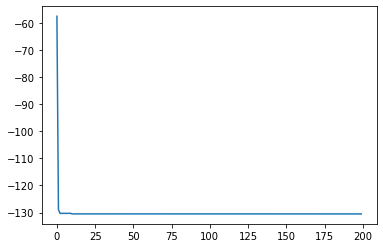

In [8]:
# Main PSO         
PSO(objective_function,bounds,particle_size,iterations)